In [ ]:
# a collection of data points into k different clusters or groups.

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
Data = { 'x': [185, 170,168,179,182,188,180,180,183,180,180,177],
         'y': [72,56,60,68,72,77,75,70,84,88,67,76]    
}

Data

{'x': [185, 170, 168, 179, 182, 188, 180, 180, 183, 180, 180, 177],
 'y': [72, 56, 60, 68, 72, 77, 75, 70, 84, 88, 67, 76]}

In [3]:
df = DataFrame(Data, columns=['x', 'y'])

In [5]:
print("The shape of the data is", df.shape)
df

# print("The shape of the data is", df.shape)

The shape of the data is (12, 2)


,x,y
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,75
7,180,70
8,183,84
9,180,88


In [8]:
# the elbow method.
wcss = [] # initializes an empty list to store the wcss value.
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[1245.5833333333333,
 513.3,
 205.25,
 122.23333333333333,
 67.5,
 37.333333333333336,
 24.833333333333336,
 14.833333333333334,
 9.833333333333332,
 5.0,
 1.0,
 0.0]

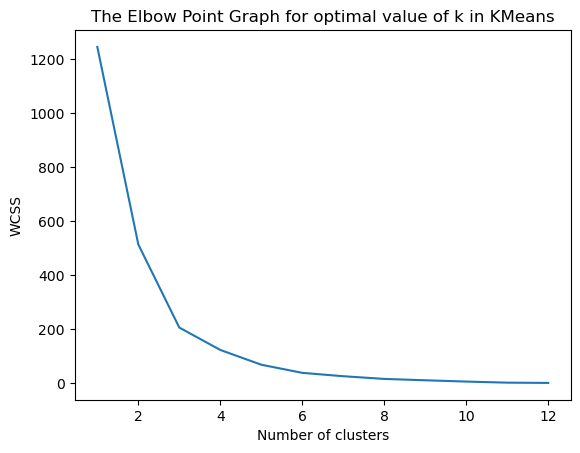

In [11]:
plt.plot(range(1,13), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Point Graph for optimal value of k in KMeans")
plt.show()

In [15]:
# k-means clustering.
my_centroids = np.array([[185,72],[170,56],[168,60]])
Kmeans = KMeans(n_clusters = 3, init = my_centroids).fit(df)

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
centroids = Kmeans.cluster_centers_
print(centroids)

[[181.4  74.9]
 [170.   56. ]
 [168.   60. ]]


In [22]:
X = df.iloc[:,:].values


y_kmeans = Kmeans.fit_predict(X)

y_kmeans

/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

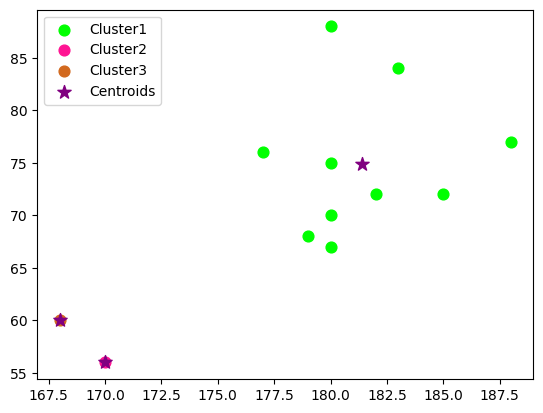

In [27]:
# Scatter plot for data points in Cluster 1.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s  = 60, c = 'lime', label = 'Cluster1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s  = 60, c = 'deeppink', label = 'Cluster2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s  = 60, c = 'chocolate', label = 'Cluster3')

plt.scatter(centroids[:,0], centroids[:,1], c='purple', s = 100, marker ='*', label = 'Centroids')

plt.legend(loc = 'lower right')      # upper left    # lower right     


plt.show()